##Hackathon - Data Analyst


## EDA

In [92]:
#Reviewing the data structure and identifying the size of the dataset, if there Nan Value, and if there duplicates

import pandas as pd
df_insurance = pd.read_csv('insurance.csv')
print(df_insurance.head())
print(df_insurance.tail())
print(df_insurance.info())
print(df_insurance.describe())
print(df_insurance.isnull().sum())
print(df_insurance.duplicated().sum())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1 

The dataset contains 1338 rows and 7 columns: age, sex, bmi, children, smoker, region, and charges.

**Data types:**

- *Numeric*: age, bmi, children, charges.

- *Categorical*: sex, smoker, region.

**Missing values**:

- No missing values ​​detected in the columns.

**Duplicates**:

- A duplicate row identified in the dataset.


Descriptive statistics:

- age ranges from 18 to 64 years.
- bmi (body mass index) ranges from 15.96 to 53.13, with an average of about 30.66.
- children (number of dependent children) ranges from 0 to 5.
- charges (medical costs) ranges from 1121.87 to 63770.43, with an average of 13270.42.

In [93]:
#dropping the duplicated row
df_insurance = df_insurance.drop_duplicates()
df_insurance.duplicated().sum()

0

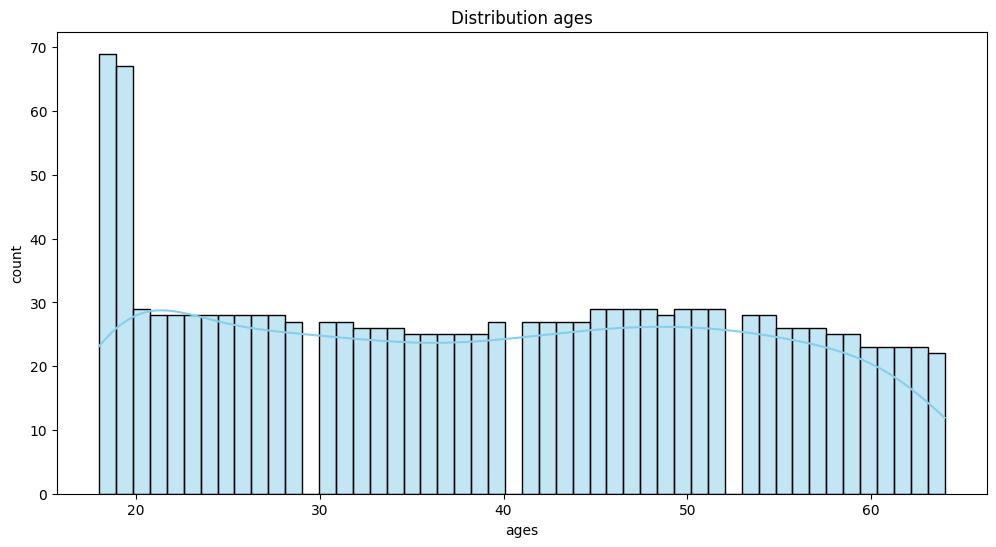

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotin the daily returns

plt.figure(figsize=(12, 6))
sns.histplot(df_insurance['age'] ,kde=True, bins=50, color='skyblue')
plt.title('Distribution ages')
plt.xlabel('ages')
plt.ylabel('count')
plt.show()


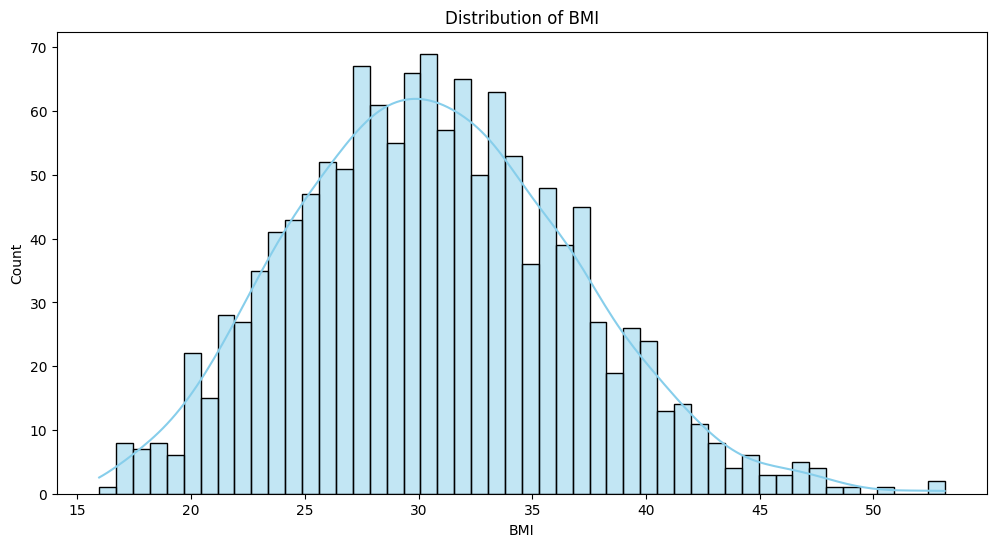

In [95]:

# Plotting the distribution of BMI
plt.figure(figsize=(12, 6))
sns.histplot(df_insurance['bmi'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


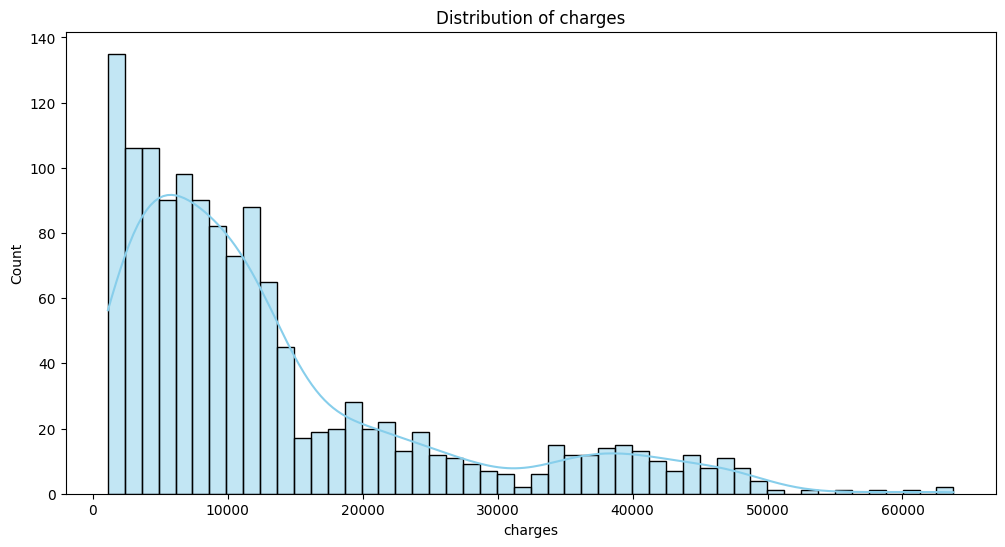

In [96]:

# Plotting the distribution of charge
plt.figure(figsize=(12, 6))
sns.histplot(df_insurance['charges'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of charges')
plt.xlabel('charges')
plt.ylabel('Count')
plt.show()


Impact of smoking:

Blue dots (smokers) are significantly more concentrated in high medical burdens, regardless of BMI level.

This indicates that smoking is a key factor for higher burdens.

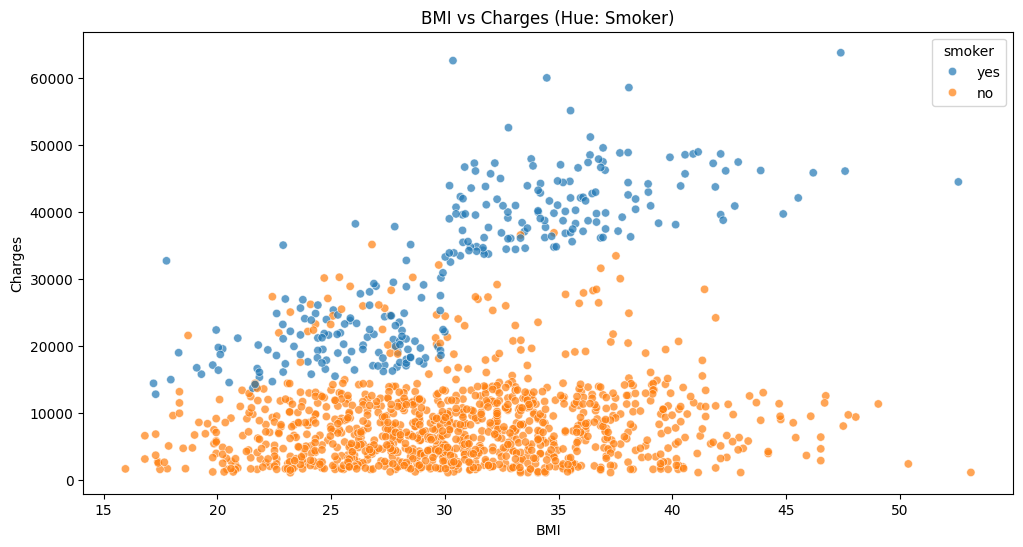

In [97]:
# Scatter plot: BMI vs Charges with hue for smoker
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_insurance, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title('BMI vs Charges (Hue: Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


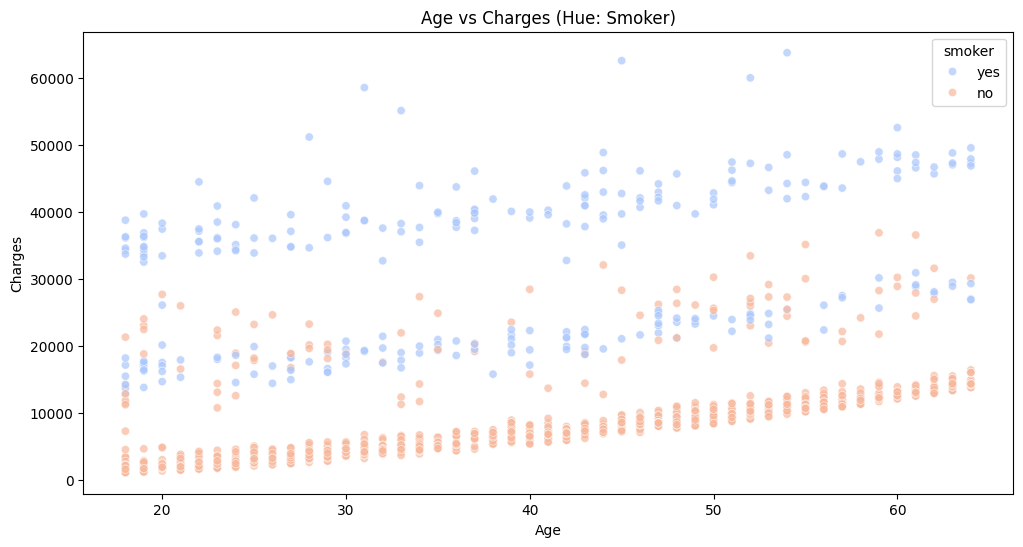

In [98]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_insurance, x='age', y='charges', hue='smoker', alpha=0.7, palette='coolwarm')
plt.title('Age vs Charges (Hue: Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


In [99]:
#creating age group
df_insurance['age_group'] = pd.cut(df_insurance['age'], bins=[17, 30, 50, 65], labels=['Young', 'Adult', 'Senior'])
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1337 non-null   int64   
 1   sex        1337 non-null   object  
 2   bmi        1337 non-null   float64 
 3   children   1337 non-null   int64   
 4   smoker     1337 non-null   object  
 5   region     1337 non-null   object  
 6   charges    1337 non-null   float64 
 7   age_group  1337 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 85.0+ KB


<ipython-input-100-4d6862c7d85e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_summary = df_insurance.groupby(['smoker', 'age_group'])['charges'].mean().reset_index()


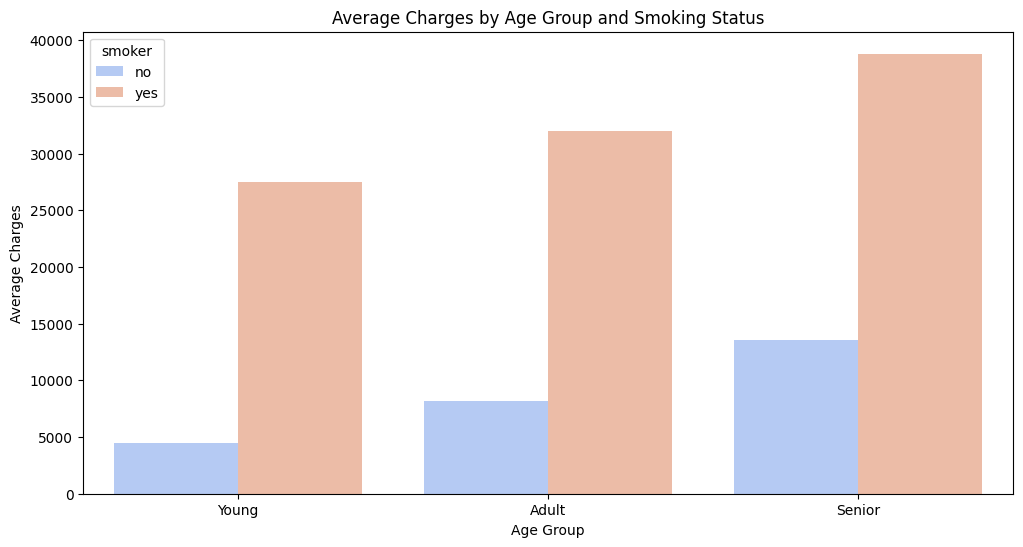

In [100]:
# Average costs per group
charges_summary = df_insurance.groupby(['smoker', 'age_group'])['charges'].mean().reset_index()

#visualizatuion by barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=charges_summary, x='age_group', y='charges', hue='smoker', palette='coolwarm')
plt.title('Average Charges by Age Group and Smoking Status')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.show()


<ipython-input-101-c6f7f23148f6>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_insurance.pivot_table(values='charges', index='age_group', columns='smoker', aggfunc='mean')


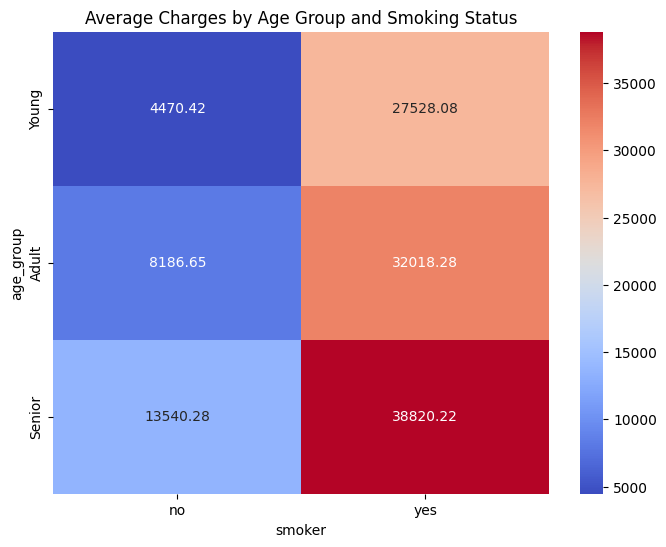

In [101]:

heatmap_data = df_insurance.pivot_table(values='charges', index='age_group', columns='smoker', aggfunc='mean')

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Charges by Age Group and Smoking Status')
plt.show()


Insight: Older smokers represent a significant risk for insurers.
Pricing based on these interactions (age and smoking status) could be justified.

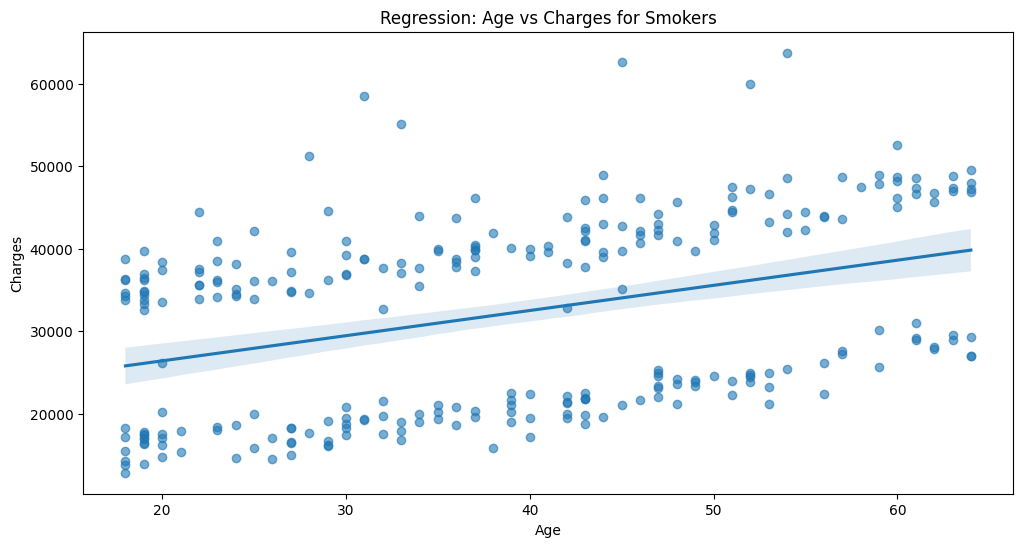

In [102]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df_insurance[df_insurance['smoker'] == 'yes'], x='age', y='charges', scatter_kws={'alpha':0.6})
plt.title('Regression: Age vs Charges for Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


 Insights:
Positive relationship:

The charges increase with age for smokers, which confirms a linear trend.
High variance:

Although the trend is linear, there is a significant spread in the charges, especially for older smokers (>50 years).
This could indicate other factors (like BMI/health conditions) influencing the charges.
Outliers:

A few points above 50,000 indicate exceptional cases of very high medical charges.

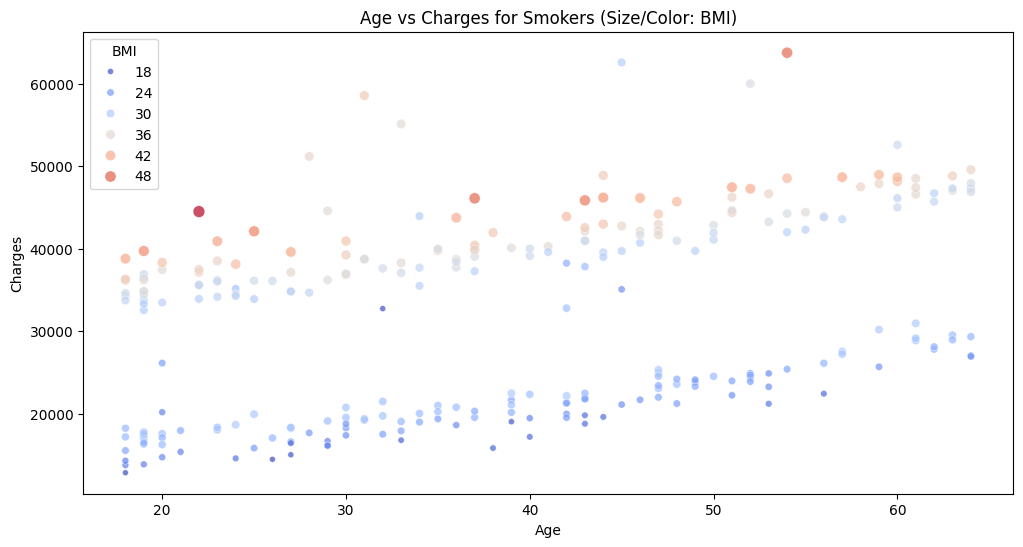

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Young
1,18,male,33.770,1,no,southeast,1725.55230,Young
2,28,male,33.000,3,no,southeast,4449.46200,Young
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult


In [103]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_insurance[df_insurance['smoker'] == 'yes'], x='age', y='charges', size='bmi', hue='bmi', palette='coolwarm', alpha=0.7)
plt.title('Age vs Charges for Smokers (Size/Color: BMI)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='BMI')
plt.show()

df_insurance.head()

This graph is even more revealing because it adds a new dimension: the impact of BMI on medical charges in smokers.

Key Insights:
Relationship between BMI and charges:

- Individuals with higher BMI (red/orange hues) tend to have higher charges.
This relationship is even more pronounced for older smokers.
Risk Combination:

- Older smokers with higher BMI are a very high-risk group, as indicated by the dots at the top of the graph.

In [104]:
df_insurance.groupby('region')['charges'].mean()

,charges
region,
northeast,13406.384516
northwest,12450.840844
southeast,14735.411438
southwest,12346.937377


In [105]:
# Encodage One-Hot
df_insurance = pd.get_dummies(df_insurance, columns=['region'], drop_first=True)

df_insurance.head()


,age,sex,bmi,children,smoker,charges,age_group,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,Young,False,False,True
1,18,male,33.770,1,no,1725.55230,Young,False,True,False
2,28,male,33.000,3,no,4449.46200,Young,False,True,False
3,33,male,22.705,0,no,21984.47061,Adult,True,False,False
4,32,male,28.880,0,no,3866.85520,Adult,True,False,False


In [106]:
df_insurance['sex_binary'] = df_insurance['sex'].map({'male': 0, 'female': 1})
df_insurance['smoker_binary'] = df_insurance['smoker'].map({'yes': 1, 'no': 0})



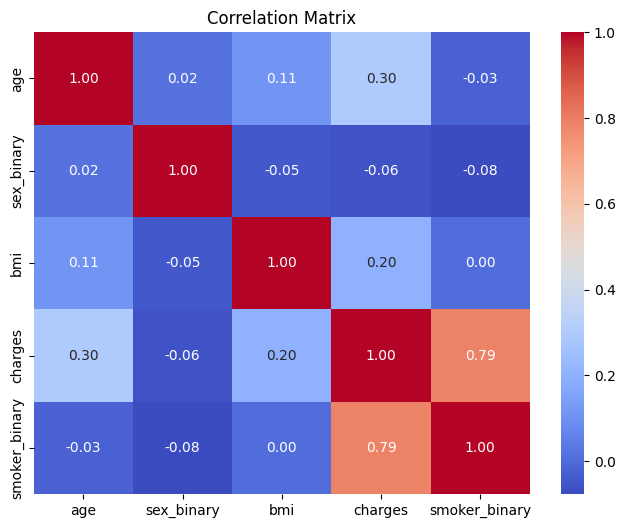

In [107]:
# correlation MAtrice
corr = df_insurance[['age', 'sex_binary', 'bmi', 'charges', 'smoker_binary']].corr() # Select only numeric features for correlation

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Key Insights:**
- Strong correlation between smoker_binary and charges (0.79):

This confirms that smoking is a major factor that strongly influences medical charges.
- Moderate correlation between age and charges (0.30):

Medical charges increase with age, but this effect is less pronounced than that of smoking.
- Weak correlation between bmi and charges (0.20):

Although BMI has an impact, its influence is less significant compared to smoker_binary and age.
- No significant correlation between sex and charges (-0.06):

Sex does not seem to play a key role in medical charges.

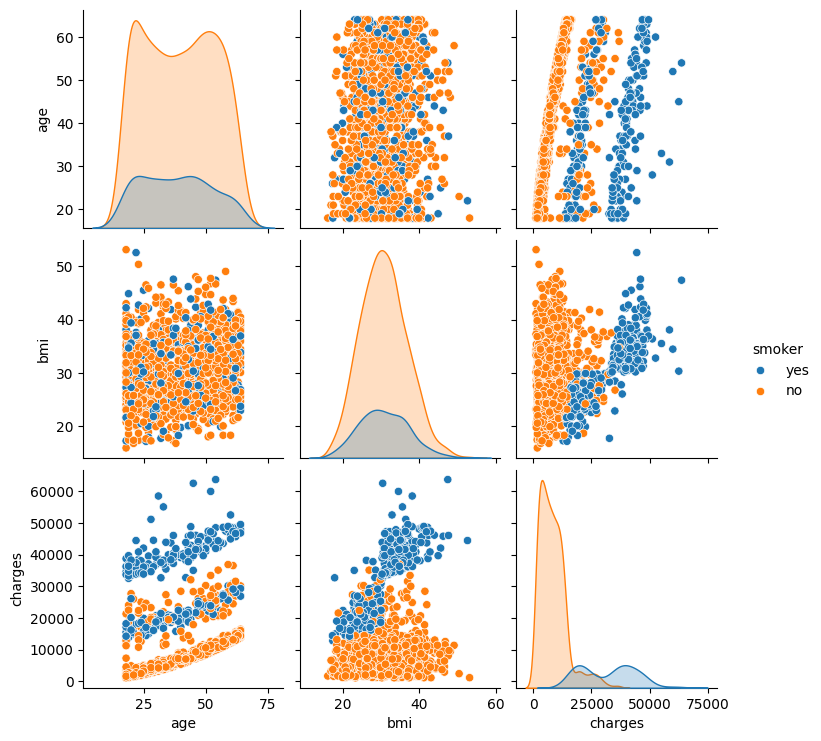

In [108]:
sns.pairplot(df_insurance, hue='smoker', vars=['age', 'bmi', 'charges'])
plt.show()


Objective: Create a predictive model to estimate the cost of insurance from key features such as age, bnmi, number of children, smoking status, regions

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate features and target
X = df_insurance[['age', 'bmi', 'children', 'smoker_binary', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df_insurance['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])


In [110]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# display model coeficiant
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)


                   Coefficient
age                3474.631428
bmi                1925.047633
children            636.568427
smoker_binary     23066.981774
region_northwest   -392.532640
region_southeast   -835.795491
region_southwest   -656.058403


In [111]:
# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Afficher les premières prédictions
for i in range(5):
    print(f"Réel : {y_test.iloc[i]}, Prédit : {y_pred[i]}")


Réel : 8688.85885, Prédit : 8198.527091089634
Réel : 5708.867, Prédit : 5689.928420359074
Réel : 11436.73815, Prédit : 14315.864674557655
Réel : 38746.3551, Prédit : 31781.372854222933
Réel : 4463.2051, Prédit : 9011.028969761031


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculer les métriques
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R² : {r2:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")



R² : 0.81
MAE : 4177.65
RMSE : 5957.53


In [115]:
from sklearn.ensemble import RandomForestRegressor

# Créer un modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [116]:
# Prédictions sur le jeu de test
y_pred_rf = rf_model.predict(X_test)


In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcul des métriques
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5


print(f"R² : {r2_rf:.2f}")
print(f"MAE : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")


R² : 0.88
MAE : 2600.37
RMSE : 4704.45


            Feature  Importance
3     smoker_binary    0.600778
1               bmi    0.221171
0               age    0.136558
2          children    0.023465
4  region_northwest    0.006762
5  region_southeast    0.006490
6  region_southwest    0.004778


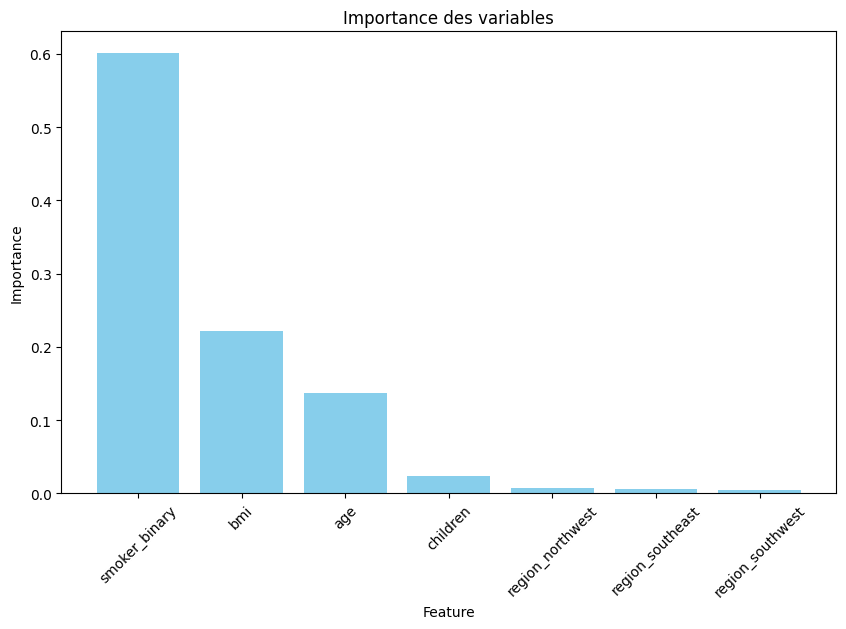

In [121]:
# Importance des features
importances = rf_model.feature_importances_
features = X_train.columns

# Afficher les importances sous forme de tableau
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Visualisation des importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Importance des variables')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()



We used two predictive models to estimate medical insurance charges:
Linear Regression and Random Forest.

The Random Forest model performed better in all metrics, especially reducing the error (MAE and RMSE).


Smoking dramatically increases insurance charges.
Smokers have significantly higher charges compared to non-smokers, making this the top factor.

Age and BMI also have a strong influence.
Older individuals and those with higher BMI tend to have higher insurance costs.

Regions have limited impact.
While there are small differences between regions, the impact is relatively minor compared to other variables.